**Maximize variance formula**


In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def pca_dim_reduction(X, M):
  assert X.ndim >= M, "M has to be less than dimensionality of X!"
         
  # * Step 1. Center Data
  X_mean = np.zeros((len(X), len(X[0])))
  X_mean[:,0] = np.mean(X[:,0])*np.ones(6)
  X_mean[:,1] = np.mean(X[:,1])*np.ones(6)
  X_centered = X - X_mean 
  
  # * Step 2. Compute Covariance Matrix
  X_cov = np.cov(X_centered.T)
    
  # * Step 3. Get Eigen Values and Vectors
  eigen_values, eigen_vectors = np.linalg.eig(X_cov)

  # * Step 4 Get the top M eigen values indices
  top_M_idx = np.argsort(eigen_values)[::-1][:M]
  
  # * Step 5 Get top M Eigen Vectors
  top_M_eigen_vectors = eigen_vectors[:,top_M_idx]
  
  # * Step 6 return projections in reduced space
  return np.dot(X_centered, top_M_eigen_vectors)  

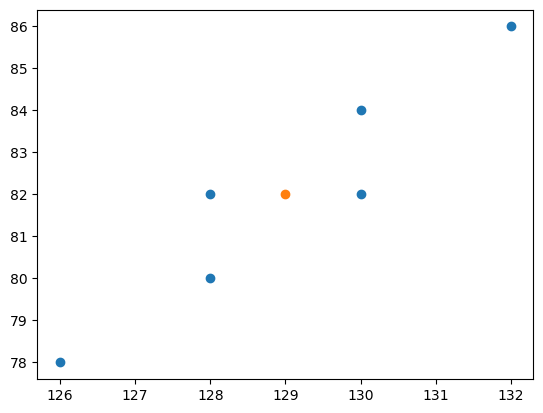

In [24]:
#A = np.array([[1,0], [2, 0], [3,0], [5,6], [6,6], [7,6]])
A = np.array([[126,78], [128,80], [128,82], [130,82], [130,84], [132,86]])
x = A[:,0]
y = A[:,1]

plt.scatter(x,y)
plt.scatter(np.mean(x),np.mean(y))
plt.show()

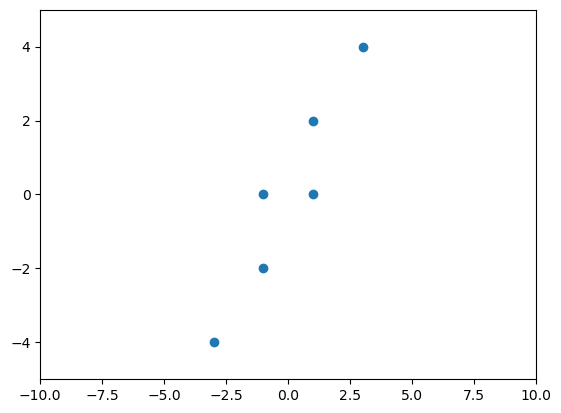

In [25]:
x_new = x - np.mean(x)
y_new = y - np.mean(y)

plt.scatter(x_new,y_new)
plt.xlim([-10,10])
plt.ylim([-5,5])
plt.show()

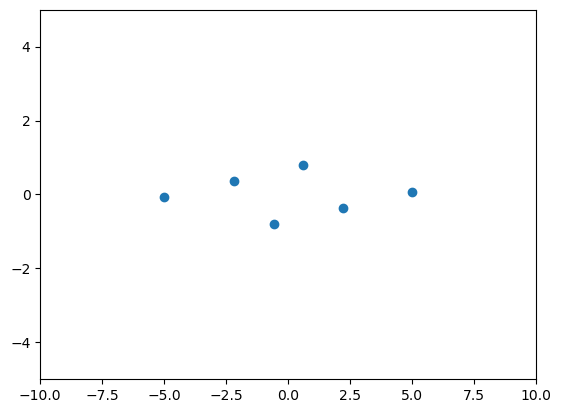

In [26]:
S = pca_dim_reduction(A,2)
plt.scatter(S[:,0], S[:,1])
plt.xlim([-10, 10])
plt.ylim([-5,5])
plt.show()

**Another approach when programming**

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
from sklearn.preprocessing import StandardScaler, KernelCenterer
from sklearn.decomposition import PCA, KernelPCA
from sklearn.utils import extmath
from sklearn.metrics.pairwise import euclidean_distances

In [34]:
def pca(X, n_components=2):
    
    # Preprocessing - Standard Scaler
    X_std = StandardScaler().fit_transform(X)
    
    #Calculate covariance matrix
    cov_mat = np.cov(X_std.T)
    
    # Get eigenvalues and eigenvectors
    eig_vals, eig_vecs = np.linalg.eigh(cov_mat) 
    
    # flip eigenvectors' sign to enforce deterministic output
    eig_vecs, _ = extmath.svd_flip(eig_vecs, np.empty_like(eig_vecs).T)
    
    # Concatenate the eigenvectors corresponding to the highest n_components eigenvalues
    matrix_w = np.column_stack([eig_vecs[:,-i] for i in range(1,n_components+1)])
    
    # Get the PCA reduced data
    Xpca = X_std.dot(matrix_w)
 
    return Xpca

In [35]:
# Scikit-learn PCA
pca1 = PCA(n_components=2)
Xpca1 = pca1.fit_transform(X)
# Our implementation
Xpca2 = pca(X, n_components=2)

NameError: name 'X' is not defined

**Kernel methods**

In [18]:
def ker_pca(X, n_components=3, gamma = 0.01):
    
    # Calculate euclidean distances of each pair of points in the data set
    dist = euclidean_distances(X, X, squared=True)
    
    # Calculate Gaussian kernel matrix
    K = np.exp(-gamma * dist)
    Kc = KernelCenterer().fit_transform(K)
    
    # Get eigenvalues and eigenvectors of the kernel matrix
    eig_vals, eig_vecs = np.linalg.eigh(Kc)
    
    # flip eigenvectors' sign to enforce deterministic output
    eig_vecs, _ = extmath.svd_flip(eig_vecs, np.empty_like(eig_vecs).T)
    
    # Concatenate the eigenvectors corresponding to the highest n_components eigenvalues
    Xkpca = np.column_stack([eig_vecs[:,-i] for i in range(1,n_components+1)])
 
    return Xkpca

In [20]:
kpca1 = KernelPCA(n_components=3, kernel='rbf', gamma=0.01)
Xkpca1 = kpca1.fit_transform(Xstd)
 
Xkpca2 = ker_pca(Xstd)

NameError: name 'Xstd' is not defined